In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

(20, 1) (20, 1)


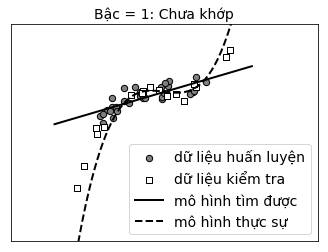

[[-36.60899473  12.02352334]]
(20, 1) (20, 1)


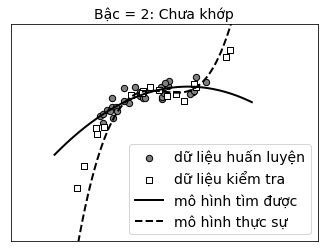

[[-47.87874716  28.04024799  -3.42792205]]
(20, 1) (20, 1)


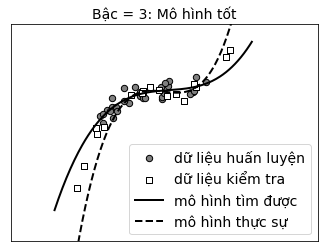

[[-55.68154664  48.54597207 -14.13134803   1.46170636]]
(20, 1) (20, 1)


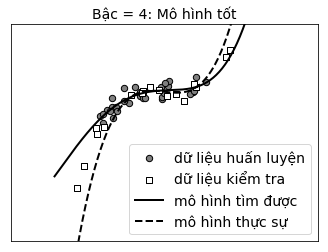

[[-53.95678886  41.55903092  -7.50986336  -0.69686712   0.22397765]]
(20, 1) (20, 1)


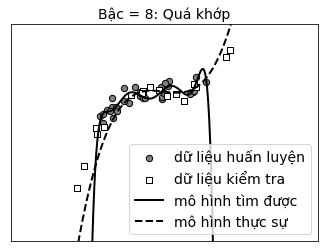

[[-7.37564339e+01  3.07450873e+02 -1.01547605e+03  1.63278090e+03
  -1.33574184e+03  5.96259518e+02 -1.47292840e+02  1.89025206e+01
  -9.82958560e-01]]
(20, 1) (20, 1)


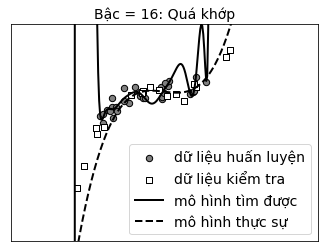

[[ 2.10678122e+01 -1.37237754e+03  9.20487427e+03 -2.85248311e+04
   4.70426790e+04 -3.91978354e+04  4.13153679e+03  2.71661582e+04
  -3.29608789e+04  2.13081752e+04 -8.98581104e+03  2.60608420e+03
  -5.24473662e+02  7.19059981e+01 -6.38812230e+00  3.29847174e-01
  -7.45465284e-03]]


In [6]:
# -*- coding: utf8 -*-
import matplotlib.font_manager as fm
set([f.name for f in fm.fontManager.ttflist])
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['font.family'] = 'Dejavu Sans'


N = 30
N_test = 20 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test,1) - 1/8) *10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in xrange(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in xrange(d+1):
        y0 += w[0][i]*x0**i

    plt.figure(figsize=(5.5,4))
    # Draw the fitting line 
    l1 = plt.scatter(X.T, y.T, c = 'gray', marker='o', s = 40, label = 'dữ liệu huấn luyện', edgecolors = 'k')     # data 
    print(X_test.shape, y_test.shape)
    l2 = plt.scatter(X_test.T, y_test.T, c = 'w', marker = 's', s = 40, label = 'dữ liệu kiểm tra', edgecolors = 'k')     # data 
    
    l3, = plt.plot(x0, y0, 'k', linewidth = 2, label = "mô hình tìm được")   # the fitting line
    l4, = plt.plot(x0, ytrue, 'k--', linewidth = 2, label = "mô hình thực sự")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 3:
        str1 = 'Chưa khớp'
    elif d > 4:
        str1 = 'Quá khớp'
    else:
        str1 = 'Mô hình tốt'
    str0 = 'Bậc = ' + str(d) + ': ' + str1
    plt.title(str0, fontsize = 14)
    plt.axis([-4, 10, np.amin(y_test) - 100, np.amax(y) + 100])
    plt.legend(handles = [l1, l2, l3, l4], fontsize = 14, loc = "best")
#     plt.legend(loc="best", )
    
    fn = 'linreg_' + str(d) + '.png'
    
#     plt.xlabel('$x$', fontsize = 20);
#     plt.ylabel('$y$', fontsize = 20);
    
#     plt.savefig(fn, bbox_inches='tight', dpi = 600)
    filename = 'poly' + str(d) + '.pdf'
    with PdfPages(filename) as pdf:
        pdf.savefig(bbox_inches='tight')
    plt.savefig('poly' + str(d) + '.png', bbox_inches = 'tight', dpi = 700)
    
    plt.show()
    print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 3)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 16)

